In [133]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

# check library versions
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
# print('matplotlib version:', plt.__version__)

numpy version: 1.21.5
pandas version: 1.4.2


In [2]:
# create dataframe and check if it works
csv_path = "../data/01-01-2012_31-12-2021/Ongevallengegevens/ongevallen.csv" # 2012 to 2021
# csv_path = "../data/01-01-2021_31-12-2021/Ongevallengegevens/ongevallen.csv" # 2021 only
df_accidents = pd.read_csv(csv_path, sep=',')
df_accidents.columns =["VKL_NUMMER","REGNUMMER","PVOPGEM","DATUM_VKL","DAG_CODE","MND_NUMMER","JAAR_VKL","TIJDSTIP","UUR","DDL_ID","AP3_CODE","AP4_CODE","AP5_CODE","ANTL_SLA","ANTL_DOD","ANTL_GZH","ANTL_SEH","ANTL_GOV","ANTL_PTJ","ANTL_TDT","MNE_CODE","AOL_ID","NIVEAUKOP","WSE_ID","WSE_AN","BEBKOM","MAXSNELHD","WVL_ID","WVG_ID","WVG_AN","WDK_ID","WDK_AN","LGD_ID","ZAD_ID","WGD_CODE_1","WGD_CODE_2","BZD_ID_VM1","BZD_ID_VM2","BZD_ID_VM3","BZD_VM_AN","BZD_ID_IF1","BZD_ID_IF2","BZD_ID_IF3","BZD_IF_AN","BZD_ID_TA1","BZD_ID_TA2","BZD_ID_TA3","BZD_TA_AN","JTE_ID","WVK_ID","HECTOMETER","FK_VELD5","HUISNUMMER","GME_ID","GME_NAAM","PVE_CODE","PVE_NAAM","KDD_NAAM","PLT_NAAM","DIENSTCODE","DIENSTNAAM","DISTRCODE","DISTRNAAM","DAGTYPE","IND_ALC","WEEKNR"]
df_accidents.head(10)

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_11280\4152118995.py:4: DtypeWarning: Columns (1,2,24,25,29,31,34,35,39,43,47,52,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents = pd.read_csv(csv_path, sep=',')


,VKL_NUMMER,REGNUMMER,PVOPGEM,DATUM_VKL,DAG_CODE,MND_NUMMER,JAAR_VKL,TIJDSTIP,UUR,DDL_ID,...,PVE_NAAM,KDD_NAAM,PLT_NAAM,DIENSTCODE,DIENSTNAAM,DISTRCODE,DISTRNAAM,DAGTYPE,IND_ALC,WEEKNR
0,20140135691,2014121457.0,J,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20140135692,2014273612.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20140135693,2014095971.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20140135694,2014081170.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,WZ,WZ,112.0,WNZ District Noord,NaN,NaN,NaN
4,20140135695,2014218979.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20140135696,2014327152.0,J,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20140135698,2014272113.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20140135699,2014334206.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20140135700,2014326638.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,20140135701,2014037969.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# check how many fields are filled in per column
for i, c in df_accidents.iteritems():
    k = 0
    for j in c:
        if not pd.isna(j):
            k+=1
    print(i, ": ", k)

VKL_NUMMER :  1138956
REGNUMMER :  961419
PVOPGEM :  43716
DATUM_VKL :  0
DAG_CODE :  0
MND_NUMMER :  0
JAAR_VKL :  1138956
TIJDSTIP :  0
UUR :  0
DDL_ID :  0
AP3_CODE :  1138956
AP4_CODE :  0
AP5_CODE :  0
ANTL_SLA :  0
ANTL_DOD :  0
ANTL_GZH :  0
ANTL_SEH :  0
ANTL_GOV :  0
ANTL_PTJ :  1138956
ANTL_TDT :  0
MNE_CODE :  0
AOL_ID :  1138956
NIVEAUKOP :  1138956
WSE_ID :  640003
WSE_AN :  151
BEBKOM :  576826
MAXSNELHD :  758225
WVL_ID :  636695
WVG_ID :  628376
WVG_AN :  4088
WDK_ID :  633319
WDK_AN :  2692
LGD_ID :  729555
ZAD_ID :  8
WGD_CODE_1 :  611356
WGD_CODE_2 :  137
BZD_ID_VM1 :  59336
BZD_ID_VM2 :  1432
BZD_ID_VM3 :  82
BZD_VM_AN :  1062
BZD_ID_IF1 :  33147
BZD_ID_IF2 :  4
BZD_ID_IF3 :  0
BZD_IF_AN :  52843
BZD_ID_TA1 :  9377
BZD_ID_TA2 :  59
BZD_ID_TA3 :  0
BZD_TA_AN :  796
JTE_ID :  272869
WVK_ID :  866087
HECTOMETER :  264931
FK_VELD5 :  1138956
HUISNUMMER :  211577
GME_ID :  1138956
GME_NAAM :  1138956
PVE_CODE :  1138956
PVE_NAAM :  1138956
KDD_NAAM :  947314
PLT_NAAM :  

In [4]:
# test dropping columns
df_test = df_accidents.drop(columns=["PVOPGEM", "DATUM_VKL"])
df_test.head(10)

,VKL_NUMMER,REGNUMMER,DAG_CODE,MND_NUMMER,JAAR_VKL,TIJDSTIP,UUR,DDL_ID,AP3_CODE,AP4_CODE,...,PVE_NAAM,KDD_NAAM,PLT_NAAM,DIENSTCODE,DIENSTNAAM,DISTRCODE,DISTRNAAM,DAGTYPE,IND_ALC,WEEKNR
0,20140135691,2014121457.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20140135692,2014273612.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20140135693,2014095971.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20140135694,2014081170.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,WZ,WZ,112.0,WNZ District Noord,NaN,NaN,NaN
4,20140135695,2014218979.0,NaN,NaN,2014,NaN,NaN,NaN,LET,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20140135696,2014327152.0,NaN,NaN,2014,NaN,NaN,NaN,LET,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20140135698,2014272113.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20140135699,2014334206.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20140135700,2014326638.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,20140135701,2014037969.0,NaN,NaN,2014,NaN,NaN,NaN,UMS,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# drop columns with less than x non empty in cells
threshold = 100000
df_2 = df_accidents
bad_rows = []
for i, c in df_accidents.iteritems():
    k = 0
    for j in c:
        if not pd.isna(j):
            k+=1
    if k <= threshold:
        bad_rows.append(i)
df_2 = df_2.drop(columns=bad_rows)
df_2.head(10)

,VKL_NUMMER,REGNUMMER,JAAR_VKL,AP3_CODE,ANTL_PTJ,AOL_ID,NIVEAUKOP,WSE_ID,BEBKOM,MAXSNELHD,...,GME_ID,GME_NAAM,PVE_CODE,PVE_NAAM,KDD_NAAM,PLT_NAAM,DIENSTCODE,DIENSTNAAM,DISTRCODE,DISTRNAAM
0,20140135691,2014121457.0,2014,UMS,5,9,E,1.0,NaN,30.0,...,1931,Krimpenerwaard,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
1,20140135692,2014273612.0,2014,UMS,3,9,E,1.0,NaN,120.0,...,1892,Zuidplas,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
2,20140135693,2014095971.0,2014,UMS,2,0,S,1.0,NaN,50.0,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
3,20140135694,2014081170.0,2014,UMS,2,0,E,1.0,NaN,100.0,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,WZ,WZ,112.0,WNZ District Noord
4,20140135695,2014218979.0,2014,LET,2,0,G,4.0,NaN,30.0,...,534,Hillegom,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
5,20140135696,2014327152.0,2014,LET,2,9,S,1.0,NaN,50.0,...,1892,Zuidplas,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
6,20140135698,2014272113.0,2014,UMS,2,0,G,5.0,NaN,50.0,...,513,Gouda,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
7,20140135699,2014334206.0,2014,UMS,1,9,E,NaN,NaN,NaN,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
8,20140135700,2014326638.0,2014,UMS,2,0,G,4.0,NaN,50.0,...,513,Gouda,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
9,20140135701,2014037969.0,2014,UMS,2,0,G,5.0,NaN,50.0,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN


range(2012, 2022)
[99353, 102160, 94593, 113289, 124992, 123930, 128225, 134617, 103578, 114219]


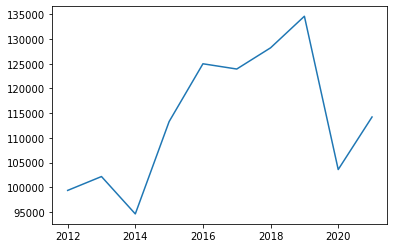

In [6]:
# plot yearly accidents

min_year = df_2.min(axis='rows', numeric_only=True)[1].astype(int)
max_year = df_2.max(axis='rows', numeric_only=True)[1].astype(int)
year = range(min_year, max_year + 1)
n_accidents = []
for i, j in enumerate(year):
    n = 0
    for k in df_2.iloc[:,2]:
        if j == k:
            n+=1
    n_accidents.insert(i, n)

print(year)
print(n_accidents)
fig, ax = plt.subplots()
ax.plot(year, n_accidents)
plt.show()

In [7]:
print(year)
print(n_accidents)
year_2 = np.array(year).reshape(-1, 1)
n_accidents_2 = n_accidents
linear_regressor = LinearRegression()
linear_regressor.fit(year_2, n_accidents_2)
Y_pred = linear_regressor.predict(year_2)

range(2012, 2022)
[99353, 102160, 94593, 113289, 124992, 123930, 128225, 134617, 103578, 114219]


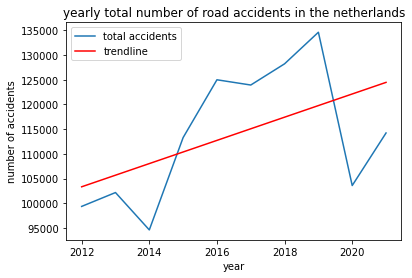

In [8]:
# show proper figure
plt.title("yearly total number of road accidents in the netherlands")
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(year, n_accidents, label="total accidents")
plt.plot(year, Y_pred, color="red", label="trendline")
plt.legend()
plt.show()

In [9]:
print(df_2["PVE_NAAM"].unique())
print(df_2["PVE_CODE"].unique())

['Zuid-Holland' 'Noord-Brabant' 'Limburg' 'Gelderland' 'Flevoland'
 'Utrecht' 'Noord-Holland' 'Friesland' 'Groningen' 'Drenthe' 'Zeeland'
 'Overijssel']
['ZH' 'NB' 'LB' 'GL' 'FL' 'UT' 'NH' 'FR' 'GR' 'DR' 'ZL' 'OV']


In [10]:
df_4 = df_2
df_4["PVE_NUMR"] = df_4["PVE_CODE"].map( {"ZH" : 1, "NB" : 2, "LB" : 3, "GL" : 4, "FL" : 5, "UT" : 6, "NH" : 7, "FR" : 8, "GR" : 9, "DR" : 10, "ZL" : 11, "OV" : 12} ).astype(int)
df_4.head(3)

,VKL_NUMMER,REGNUMMER,JAAR_VKL,AP3_CODE,ANTL_PTJ,AOL_ID,NIVEAUKOP,WSE_ID,BEBKOM,MAXSNELHD,...,GME_NAAM,PVE_CODE,PVE_NAAM,KDD_NAAM,PLT_NAAM,DIENSTCODE,DIENSTNAAM,DISTRCODE,DISTRNAAM,PVE_NUMR
0,20140135691,2014121457.0,2014,UMS,5,9,E,1.0,NaN,30.0,...,Krimpenerwaard,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,1
1,20140135692,2014273612.0,2014,UMS,3,9,E,1.0,NaN,120.0,...,Zuidplas,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,1
2,20140135693,2014095971.0,2014,UMS,2,0,S,1.0,NaN,50.0,...,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,1


In [11]:
df_5 = df_4[["JAAR_VKL", "PVE_CODE", "PVE_NUMR"]]
df_5.head(5)

,JAAR_VKL,PVE_CODE,PVE_NUMR
0,2014,ZH,1
1,2014,ZH,1
2,2014,ZH,1
3,2014,ZH,1
4,2014,ZH,1


In [12]:
years_6 = df_5["JAAR_VKL"].unique()
provinces_6 = df_5["PVE_CODE"].unique()
provinces_number_6 = df_5["PVE_NUMR"].unique()

df_6 = pd.DataFrame(columns=["YEAR", "PROVINCE", "N_ACCIDENTS"])
i = 0
for j in years_6:
    for k in provinces_6:
        df_6.loc[i] = [j, k, 0]
        i+=1


df_6

,YEAR,PROVINCE,N_ACCIDENTS
0,2014,ZH,0
1,2014,NB,0
2,2014,LB,0
3,2014,GL,0
4,2014,FL,0
...,...,...,...
115,2018,FR,0
116,2018,GR,0
117,2018,DR,0
118,2018,ZL,0


In [205]:
for i, j in df_5.iterrows():
    for k, l in df_6.iterrows():
        if j[0] == l[0] and j[1] == l[1]:
            df_6.iloc[k, 2] = df_6.iloc[k, 2] +1
            break

df_6

KeyboardInterrupt: 

In [128]:
target_province = "GR"
df_7 = df_5.loc[df_5["PVE_CODE"] == target_province]
df_9 = df_7["JAAR_VKL"].value_counts()
df_10 = df_9.reset_index()
df_11 = df_10.sort_values("index", ignore_index=True)
df_11

,index,JAAR_VKL
0,2012,3855
1,2013,3796
2,2014,3195
3,2015,3697
4,2016,3732
5,2017,3725
6,2018,3566
7,2019,3902
8,2020,3087
9,2021,3222


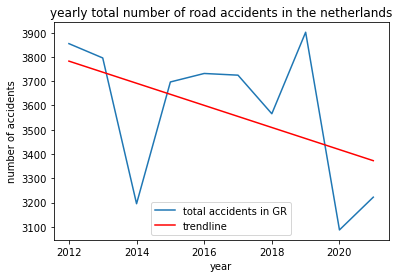

In [156]:
year = df_11.iloc[:,0]
n_accidents = df_11.iloc[:,1]
year_2 = np.array(year).reshape(-1, 1)
n_accidents_2 = n_accidents
linear_regressor = LinearRegression()
linear_regressor.fit(year_2, n_accidents_2)
Y_pred = linear_regressor.predict(year_2)
plt.title("yearly total number of road accidents in the netherlands")
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(year, n_accidents, label="total accidents in " + target_province)
plt.plot(year, Y_pred, color="red", label="trendline")
plt.legend()
plt.show()

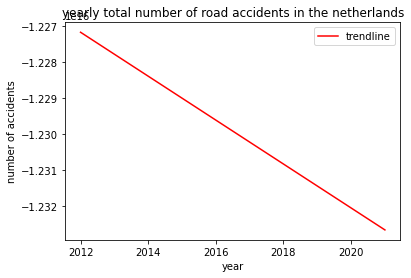

In [153]:
year = df_11.iloc[:,0]
n_accidents = df_11.iloc[:,1]
year_2 = np.array(year).reshape(-1, 1)
n_accidents_2 = n_accidents
SGD_regression = SGDRegressor()
SGD_regression.fit(year_2, n_accidents_2)
Y_pred = SGD_regression.predict(year_2)
plt.title("yearly total number of road accidents in the netherlands")
plt.xlabel("year")
plt.ylabel("number of accidents")

# plt.plot(year, n_accidents, label="total accidents in " + target_province)
plt.plot(year, Y_pred, color="red", label="trendline")
plt.legend()
plt.show()